<a href="https://colab.research.google.com/github/amina1204/amina1204/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Explanation:**
pandas is used for data manipulation and analysis, especially for loading and working with tabular data.

matplotlib.pyplot and seaborn are used for data visualization. seaborn is built on top of matplotlib and provides an easier way to create beautiful statistical graphics.


# 2. Loading Hospital Data

In [157]:
# Load the hospital visits data
def load_hospital_data(file_path):
    """Load hospital visit data from an Excel file."""

    """
    Load hospital visit data from an Excel file.

    Parameters:
    file_path (str): Path to the Excel file containing the hospital data.

    Returns:
    pd.DataFrame: A DataFrame containing hospital visit data from the specified Excel file.
    """
    return pd.read_excel(file_path, sheet_name="HospitalVisits")

**Explanation:**
This function reads the hospital visit data from an Excel file. It uses the pandas read_excel() function, specifying the HospitalVisits sheet.

This helps with Data Access and Formats by loading data from an external Excel file, demonstrating access to different data sources.

# 3. Simulating Additional Data (Hospital Ratings)

In [158]:
# Simulate additional data (e.g., hospital ratings)
def load_hospital_ratings():
    """Create a mock dataset with hospital ratings.


    This function simulates hospital ratings data with predefined values for five hospitals.

    Returns:
    pd.DataFrame: A DataFrame containing hospital names and their respective ratings."""
    data = {
        'Hospital': [
            'Edwards-Lee', 'Buchanan, Zavala and George',
            'Evans, Mitchell and Hodge', 'Gonzalez-Roman',
            'Edwards, Hernandez and Little'
        ],
        'Rating': [4.5, 3.8, 4.2, 4.7, 4.0]
    }


    return pd.DataFrame(data)

**Explanation:**
This function creates a mock dataset containing hospitals and their respective ratings. This simulated data could represent how patients rate hospitals after visits.

 This contributes to Data Access and Formats, as this is another data source (hospital ratings) in a pandas DataFrame format.

# 4. Simulating Additional Data (Patient Demographics)

In [159]:
# Simulate additional patient data
def load_patient_data():
    """Create a mock dataset with patient demographics.
     This function simulates patient demographic data including patient ID, age, and gender.

    Returns:
    pd.DataFrame: A DataFrame containing patient ID, age, and gender data."""
    data = {
        'PatientID': [69, 106, 160, 103, 135],
        'Age': [45, 34, 67, 29, 50],
        'Gender': ['Female', 'Male', 'Male', 'Female', 'Male']
    }
    return pd.DataFrame(data)

**Explanation:**
This function creates another mock dataset with patient demographics: IDs, ages, and genders.

 This continues to support Data Access and Formats by simulating another type of data, specifically for patients.

# 5. Merging Data (Hospital Data with Ratings)

In [160]:
# Merge hospital data with ratings
def merge_data(hospital_data, ratings_data):
    """Merge hospital visit data with ratings.
   Parameters:
    hospital_data (pd.DataFrame): DataFrame containing hospital visit data.
    ratings_data (pd.DataFrame): DataFrame containing hospital ratings data.

    Returns:
    pd.DataFrame: Merged DataFrame containing both hospital visit and ratings data.
    """
    return pd.merge(hospital_data, ratings_data, on="Hospital", how="left")

**Explanation:**
This function merges the hospital visit data with the hospital ratings using the pandas merge() function. It matches hospitals based on their names.

 This supports Data Merging, as two datasets are being merged into one.



# 6. Merging Data (Hospital Data with Patient Data)

In [161]:
# Merge hospital data with patient data
def merge_with_patient_data(hospital_data, patient_data):
    """Merge hospital visit data with patient demographics.
    Parameters:
    hospital_data (pd.DataFrame): DataFrame containing hospital visit data.
    patient_data (pd.DataFrame): DataFrame containing patient demographic data.

    Returns:
    pd.DataFrame: Merged DataFrame containing hospital visit and patient demographic data.
    """
    return pd.merge(hospital_data, patient_data, on="PatientID", how="left")

**Explanation:**
This function merges the hospital visit data with patient demographic data based on the PatientID field. This provides a more comprehensive view of hospital visits, integrating patient information.

# 7. Data Aggregation by Hospital

In [162]:
# Perform data aggregation
def aggregate_visits_by_hospital(data):
    """Aggregate the number of visits by hospital.
   Parameters:
    data (pd.DataFrame): DataFrame containing hospital visit data.

    Returns:
    pd.DataFrame: A DataFrame containing the count of visits per hospital.
    """
    return data.groupby('Hospital').size().reset_index(name='VisitCount')

**Explanation:**
This function aggregates the number of visits per hospital by grouping the data by the Hospital column and counting the number of occurrences (visits).

# 8. Data Aggregation by Year

In [163]:
def aggregate_visits_by_year(data):
    """Aggregate the number of visits by year.
    Parameters:
    data (pd.DataFrame): DataFrame containing hospital visit data.

    Returns:
    pd.DataFrame: A DataFrame containing the count of visits per year.
"""
    return data.groupby('Year').size().reset_index(name='YearlyVisitCount')

**Explanation:**
Similar to the previous step, this function aggregates data by the year of the visit, counting how many visits occurred each year.

# 9. Data Transformation

In [164]:
# Perform field-level transformations
def transform_data(data):
     """
    Add new features and perform transformations on the hospital visit data.

    This function extracts the year, month, and weekend status from visit dates. It also categorizes hospital ratings.

    Parameters:
    data (pd.DataFrame): DataFrame containing hospital visit data.

    Returns:
    pd.DataFrame: Transformed DataFrame with new features (Year, Month, IsWeekend, RatingCategory).
    """
     data['Year'] = pd.to_datetime(data['VisitDate']).dt.year
     data['Month'] = pd.to_datetime(data['VisitDate']).dt.month # Indentation corrected to match 'Year' line
     data['IsWeekend'] = pd.to_datetime(data['VisitDate']).dt.dayofweek >= 5
     data['RatingCategory'] = pd.cut(
         data['Rating'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High']
     )
     return data

**Explanation:**
Several field-level transformations are performed here:
The visit date is transformed into Year and Month fields.
A new boolean feature, IsWeekend, is created to check if the visit occurred on a weekend.
The Rating field is transformed into categorical groups (Low, Medium, High), based on specific ranges.

# 10. Creating Visualizations

In [165]:
# Create visualizations
def create_visualizations(data):
    """
    Generate and save visualizations based on hospital visit data.

    This function creates three visualizations:
    1. Bar plot showing the number of visits per hospital.
    2. Histogram showing the distribution of hospital ratings.
    3. Line plot showing yearly visits count.

    Parameters:
    data (pd.DataFrame): DataFrame containing transformed hospital visit data.

    Outputs:
    Saves three visualization images to the working directory.
    """


    # Visualization 1: Number of visits per hospital
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Hospital', y='VisitCount', data=aggregate_visits_by_hospital(data))
    plt.xticks(rotation=45, ha='right')
    plt.title('Number of Visits per Hospital')
    plt.savefig('visits_per_hospital.png')

    # Visualization 2: Ratings distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Rating'], kde=True, bins=10, color='skyblue', alpha=0.7, edgecolor='black')
    plt.axvline(data['Rating'].mean(), color='red', linestyle='--', label=f'Mean: {data["Rating"].mean():.2f}')
    plt.axvline(data['Rating'].median(), color='green', linestyle='-', label=f'Median: {data["Rating"].median():.2f}')
    plt.title('Detailed Distribution of Hospital Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('ratings_distribution_detailed.png')

    # Visualization 3: Yearly visits count
    yearly_data = aggregate_visits_by_year(data)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='YearlyVisitCount', data=yearly_data, marker='o', linewidth=2, color='blue')
    for i in range(len(yearly_data)):
        plt.text(x=yearly_data['Year'][i], y=yearly_data['YearlyVisitCount'][i] + 5,
                 s=str(yearly_data['YearlyVisitCount'][i]),
                 color='black', ha='center')
    plt.title('Detailed Yearly Visits Count')
    plt.xlabel('Year')
    plt.ylabel('Number of Visits')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('visits_per_year_detailed.png')

**Explanation:**
This function creates three visualizations:
A bar plot showing the number of visits per hospital.
A histogram showing the distribution of hospital ratings.
A line plot showing yearly visits count.

In [166]:
# Load data
hospital_data = load_hospital_data('health_datasets.xlsx')

In [167]:
hospital_data.head()

,VisitID,PatientID,Hospital,VisitDate,Reason
0,1,69,Edwards-Lee,2020-07-07,Newspaper region specific eat where arm during.
1,2,106,"Buchanan, Zavala and George",2020-12-04,Task argue property follow quickly produce con...
2,3,160,"Evans, Mitchell and Hodge",2022-02-25,Program actually quickly office director long ...
3,4,103,Gonzalez-Roman,2020-01-11,Same recognize clear.
4,5,135,"Edwards, Hernandez and Little",2022-09-10,Total success how seem he person.


In [168]:
ratings_data = load_hospital_ratings()

In [169]:
ratings_data.head()

,Hospital,Rating
0,Edwards-Lee,4.5
1,"Buchanan, Zavala and George",3.8
2,"Evans, Mitchell and Hodge",4.2
3,Gonzalez-Roman,4.7
4,"Edwards, Hernandez and Little",4.0


In [170]:
patient_data = load_patient_data()

In [171]:
patient_data.head()

,PatientID,Age,Gender
0,69,45,Female
1,106,34,Male
2,160,67,Male
3,103,29,Female
4,135,50,Male


In [172]:
# Merge data
merged_data = merge_data(hospital_data, ratings_data)

In [173]:
merged_data.head()

,VisitID,PatientID,Hospital,VisitDate,Reason,Rating
0,1,69,Edwards-Lee,2020-07-07,Newspaper region specific eat where arm during.,4.5
1,2,106,"Buchanan, Zavala and George",2020-12-04,Task argue property follow quickly produce con...,3.8
2,3,160,"Evans, Mitchell and Hodge",2022-02-25,Program actually quickly office director long ...,4.2
3,4,103,Gonzalez-Roman,2020-01-11,Same recognize clear.,4.7
4,5,135,"Edwards, Hernandez and Little",2022-09-10,Total success how seem he person.,4.0


In [174]:
merged_data = merge_with_patient_data(merged_data, patient_data)

In [175]:
merged_data.head()

,VisitID,PatientID,Hospital,VisitDate,Reason,Rating,Age,Gender
0,1,69,Edwards-Lee,2020-07-07,Newspaper region specific eat where arm during.,4.5,45.0,Female
1,2,106,"Buchanan, Zavala and George",2020-12-04,Task argue property follow quickly produce con...,3.8,34.0,Male
2,3,160,"Evans, Mitchell and Hodge",2022-02-25,Program actually quickly office director long ...,4.2,67.0,Male
3,4,103,Gonzalez-Roman,2020-01-11,Same recognize clear.,4.7,29.0,Female
4,5,135,"Edwards, Hernandez and Little",2022-09-10,Total success how seem he person.,4.0,50.0,Male


In [176]:
transformed_data = transform_data(merged_data)

In [177]:
transformed_data.head()

,VisitID,PatientID,Hospital,VisitDate,Reason,Rating,Age,Gender,Year,Month,IsWeekend,RatingCategory
0,1,69,Edwards-Lee,2020-07-07,Newspaper region specific eat where arm during.,4.5,45.0,Female,2020,7,False,High
1,2,106,"Buchanan, Zavala and George",2020-12-04,Task argue property follow quickly produce con...,3.8,34.0,Male,2020,12,False,Medium
2,3,160,"Evans, Mitchell and Hodge",2022-02-25,Program actually quickly office director long ...,4.2,67.0,Male,2022,2,False,High
3,4,103,Gonzalez-Roman,2020-01-11,Same recognize clear.,4.7,29.0,Female,2020,1,True,High
4,5,135,"Edwards, Hernandez and Little",2022-09-10,Total success how seem he person.,4.0,50.0,Male,2022,9,True,Medium


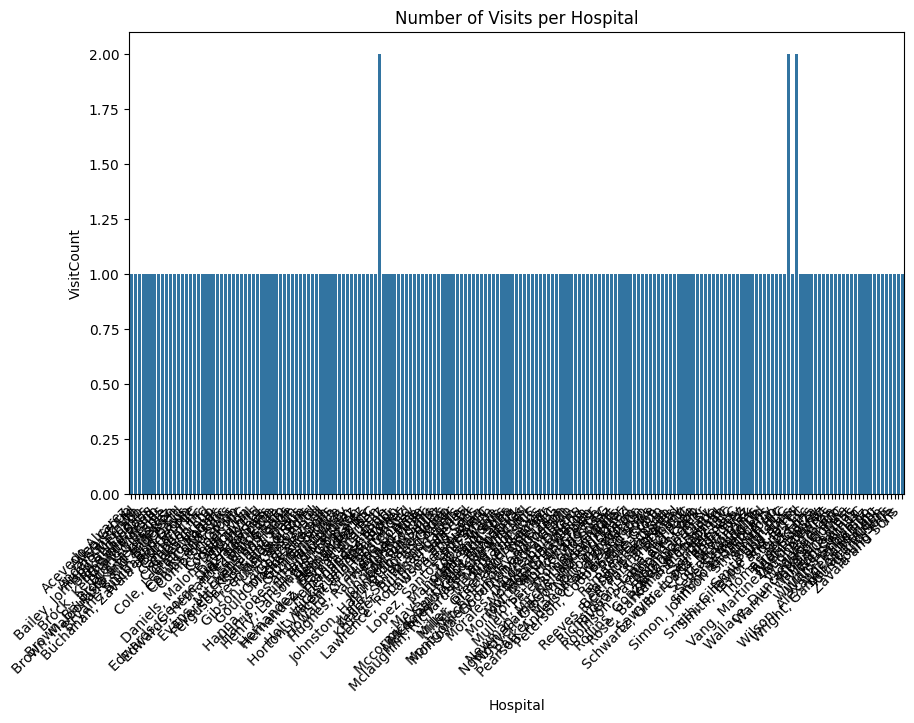

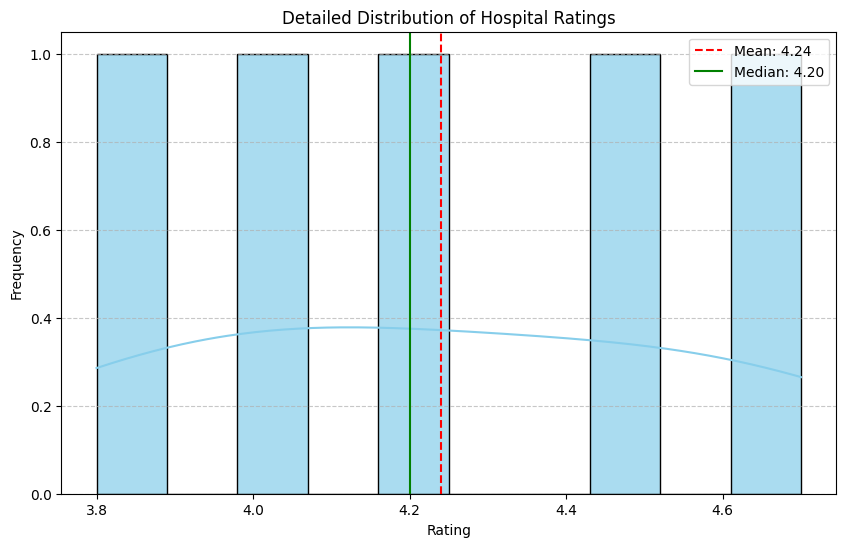

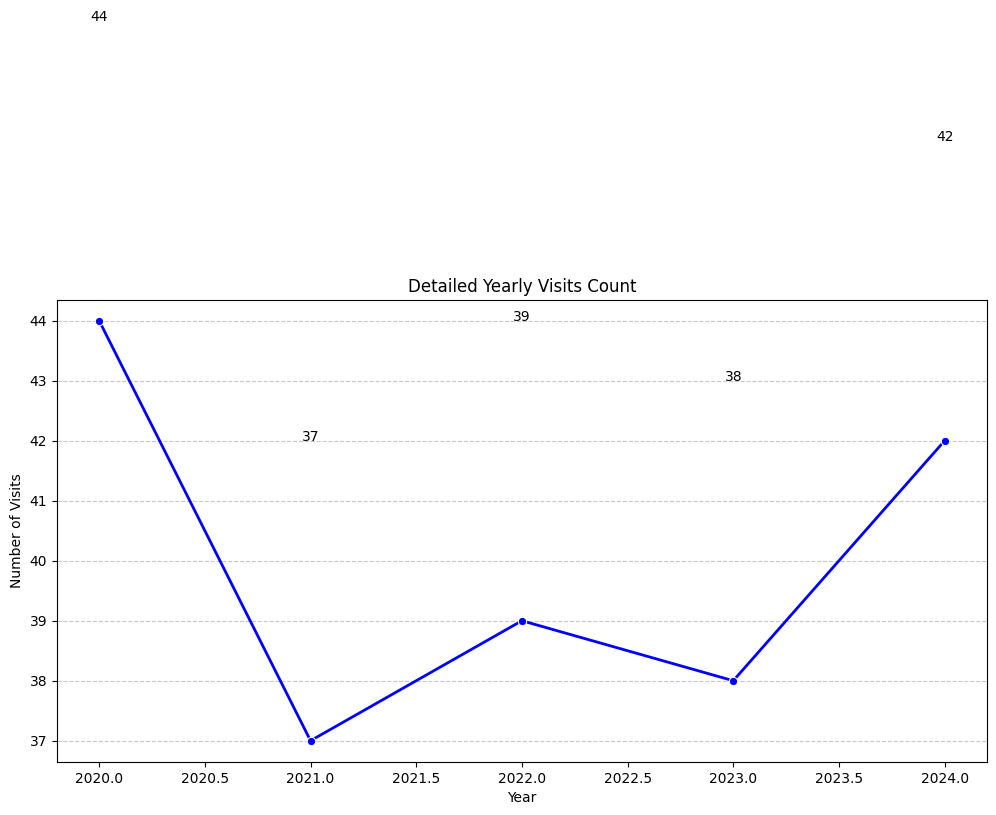

In [178]:
# Create visualizations
create_visualizations(transformed_data)

# 11. Saving Transformed Data

In [179]:
# Save transformed data
transformed_data.to_csv('transformed_hospital_data.csv', index=False)

**Explanation:**
The transformed data is saved as a CSV file, which is useful for further analysis or sharing.